In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from pathlib import Path
import concord as ccd
import re
%matplotlib inline

In [75]:
proj_name = "resources_profiling"
data_dir = Path("/Volumes/Shared/Concord_backup/save/summary_resource_profiling")
file_suffix = time.strftime('%b%d-%H%M')

save_dir = Path(f"../save/{proj_name}-{file_suffix}")
save_dir.mkdir(parents=True, exist_ok=True)

In [ ]:
dataframes = {}

for file in data_dir.glob("*.tsv"):
    if file.name.startswith("._") or file.stat().st_size < 10:
        continue  # Skip hidden/empty files

    # Extract name between 'benchmark_' and '_summary'
    match = re.search(r"benchmark_(.*)_summary", file.stem)
    if match:
        df_name = match.group(1)
    else:
        df_name = file.stem  # fallback

    try:
        dataframes[df_name] = pd.read_csv(file, sep="\t", encoding="utf-8")
    except UnicodeDecodeError:
        try:
            dataframes[df_name] = pd.read_csv(file, sep="\t", encoding="ISO-8859-1")
            print(f"Loaded with fallback encoding: {file.name}")
        except Exception as e:
            print(f"❌ Failed to load {file.name}: {e}")

In [11]:
dataframes

{'cross_tissue_Eraslan':         method  gpu_name    time_sec       ram_MB     vram_MB
 0        liger  Tesla T4         NaN          NaN         NaN
 1      harmony  Tesla T4   99.147545   176.511719    0.000000
 2    scanorama  Tesla T4  356.766477  5707.636719    0.000000
 3         scvi  Tesla T4  609.883795   899.890625   78.780273
 4  contrastive  Tesla T4  146.655514   833.363281   74.510254
 5  concord_knn  Tesla T4  106.105374  1087.105469  129.163086
 6  concord_hcl  Tesla T4  110.782367  1011.859375  129.084961,
 'HypoMap_Steuernagel':         method  gpu_name     time_sec       ram_MB     vram_MB
 0        liger  Tesla T4  6626.408429  6264.929688    0.000000
 1      harmony  Tesla T4    95.054201   188.218750    0.000000
 2    scanorama  Tesla T4   525.126471  3644.308594    0.000000
 3         scvi  Tesla T4   585.604237   971.308594   78.458008
 4  contrastive  Tesla T4   328.417374  1041.402344   85.699707
 5  concord_knn  Tesla T4   178.002168  1210.242188  134.342773


In [6]:
datasets = dataframes.keys()
methods = sorted(set(
    method
    for df in dataframes.values()
    for method in df["method"]
))
print(f"Datasets: {datasets}")
print(f"Methods: {methods}")

Datasets: dict_keys(['cross_tissue_Eraslan', 'HypoMap_Steuernagel', 'immune_DominguezConde', 'pancreatic_islet_Hrovatin', 'TabulaSapiens'])
Methods: ['concord_hcl', 'concord_knn', 'contrastive', 'harmony', 'liger', 'scanorama', 'scvi']


In [26]:
ram_df = pd.DataFrame(index=methods, columns=datasets)

for dataset, df in dataframes.items():
    df = df.set_index("method")
    ram_df[dataset] = df["ram_MB"]

# save the DataFrame with file suffix in the same directory
ram_df.to_csv(data_dir / f"summary_ram_usage_{file_suffix}.csv")

In [27]:
vram_df = pd.DataFrame(index=methods, columns=datasets)

for dataset, df in dataframes.items():
    df = df.set_index("method")
    vram_df[dataset] = df["vram_MB"]

# save the DataFrame with file suffix in the same directory
vram_df.to_csv(data_dir / f"summary_vram_usage_{file_suffix}.csv")

In [28]:
time_df = pd.DataFrame(index=methods, columns=datasets)
for dataset, df in dataframes.items():
    df = df.set_index("method")
    time_df[dataset] = df["time_sec"]

# save the DataFrame with file suffix in the same directory
time_df.to_csv(data_dir / f"summary_time_usage_{file_suffix}.csv")

In [29]:
ram_df

,cross_tissue_Eraslan,HypoMap_Steuernagel,immune_DominguezConde,pancreatic_islet_Hrovatin,TabulaSapiens
concord_hcl,1011.859375,1092.531250,1046.699219,1027.625000,1277.632812
concord_knn,1087.105469,1210.242188,1159.488281,1158.289062,1766.789062
contrastive,833.363281,1041.402344,882.175781,866.453125,1188.519531
harmony,176.511719,188.218750,280.542969,207.953125,328.957031
liger,NaN,6264.929688,2892.328125,8890.417969,NaN
scanorama,5707.636719,3644.308594,2339.109375,4562.476562,NaN
scvi,899.890625,971.308594,946.285156,934.242188,1162.226562


In [30]:
vram_df

,cross_tissue_Eraslan,HypoMap_Steuernagel,immune_DominguezConde,pancreatic_islet_Hrovatin,TabulaSapiens
concord_hcl,129.084961,133.881836,132.380371,131.316406,161.064453
concord_knn,129.163086,134.342773,133.190918,132.288086,180.671387
contrastive,74.510254,85.699707,81.532715,77.149414,174.966797
harmony,0.000000,0.000000,0.000000,0.000000,0.000000
liger,NaN,0.000000,0.000000,0.000000,NaN
scanorama,0.000000,0.000000,0.000000,0.000000,NaN
scvi,78.780273,78.458008,78.375000,78.696777,78.541016


In [31]:
time_df

,cross_tissue_Eraslan,HypoMap_Steuernagel,immune_DominguezConde,pancreatic_islet_Hrovatin,TabulaSapiens
concord_hcl,110.782367,189.660176,169.189042,158.978262,586.236985
concord_knn,106.105374,178.002168,160.150785,151.228319,535.774009
contrastive,146.655514,328.417374,296.793190,220.595736,480.897231
harmony,99.147545,95.054201,69.870940,112.001676,306.306581
liger,NaN,6626.408429,6479.283357,5830.149941,NaN
scanorama,356.766477,525.126471,793.120036,591.291651,NaN
scvi,609.883795,585.604237,580.049580,632.622458,600.236722


In [79]:
from benchmark_utils import plot_resource_usage_heatmap


In [62]:
method_order = [
    "liger", "harmony", "scanorama",
    "scvi", "contrastive", "concord_knn", "concord_hcl"
]



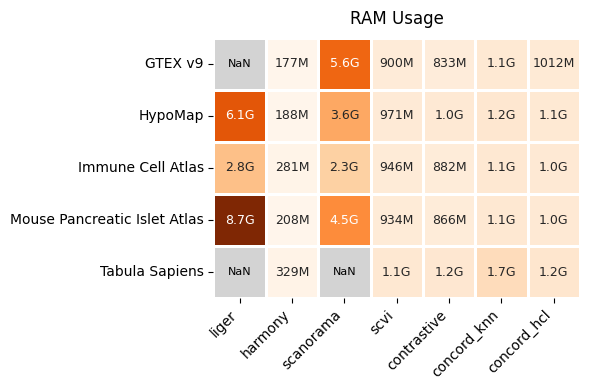

In [80]:
plot_resource_usage_heatmap(ram_df, resource_type="RAM", title="RAM Usage",
                            method_order=method_order,
                             figsize=(6, 4), 
                             save_dir=save_dir, file_name=f"summary_ram_usage_heatmap_{file_suffix}",
                             save_format="pdf")

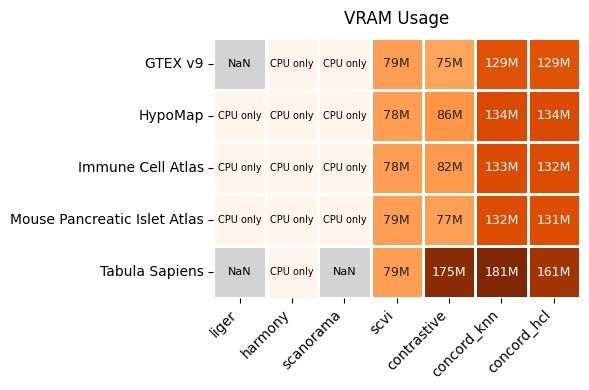

In [81]:
plot_resource_usage_heatmap(vram_df, resource_type="VRAM", title="VRAM Usage",
                            method_order=method_order, 
                            figsize=(6, 4), 
                            save_dir=save_dir, file_name=f"summary_vram_usage_heatmap_{file_suffix}",
                            save_format="pdf")

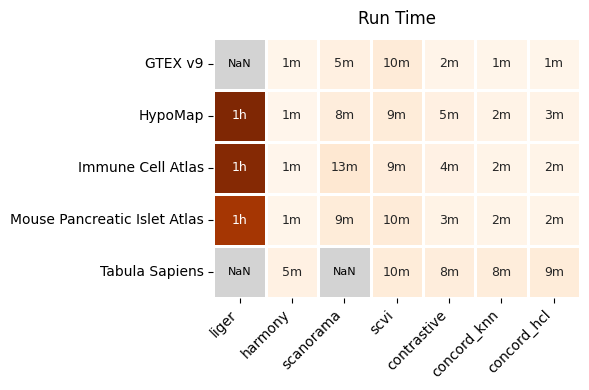

In [82]:
plot_resource_usage_heatmap(time_df, resource_type="Time", title="Run Time",
                            method_order=method_order, 
                            figsize=(6, 4),
                            save_dir=save_dir, file_name=f"summary_time_usage_heatmap_{file_suffix}",
                            save_format="pdf")